# Objective and business problem - 
The CEO wants to know why the employees are resigning and how to solve the problem, employee retention

https://www.kaggle.com/datasets/lnvardanyan/hr-analytics

# OSEMN pipeline

Obtaining the data is the first approach in solving the problem.

Scrubbing or cleaning the data is the next step. This includes data imputation of missing or invalid data and fixing column names.

Exploring the data will follow right after and allow further insight of what our dataset contains. Looking for any outliers or weird data. Understanding the relationship each explanatory variable has with the response variable resides here and we can do this with a correlation matrix.

Modeling the data will give us our predictive power on whether an employee will leave.

INterpreting the data is last. With all the results and analysis of the data, what conclusion is made? What factors contributed most to employee turnover? What relationship of variables were found?

# Part 1 - Obtaining the data

In [1]:
#importing the necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as matplot
%matplotlib inline

In [2]:
#reading the dataset into a dataframe
df = pd.read_csv("turnover.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Part 2 - Data cleaning & scrubbing

In [3]:
#check if any null values are present
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [4]:
#renaming columns for easier readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [5]:
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
#moving the turnover column to the beginning of the table
front = df["turnover"]
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, "turnover", front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


# Part 3 - Data exploration

In [7]:
#exploring the rows and columns in the dataframe
df.shape

(14999, 10)

In [8]:
#checking the datatypes of our columns and obeservations
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [9]:
#no of rows
len(df)

14999

In [10]:
#the value of each turnover value, i.e, 0 or 1 - 0 = non-turnover, 1 = turnover, turnover = resigned from company
df.turnover.value_counts()

0    11428
1     3571
Name: turnover, dtype: int64

In [11]:
#studying the employee turnover data
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [12]:
#statistical overview of the dataframe
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [13]:
#overview of summary
turnover_summary = df.groupby("turnover")
turnover_summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [14]:
#correlation matrix and heatmap
corr = df.corr()
corr = (corr)
corr

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


<AxesSubplot:>

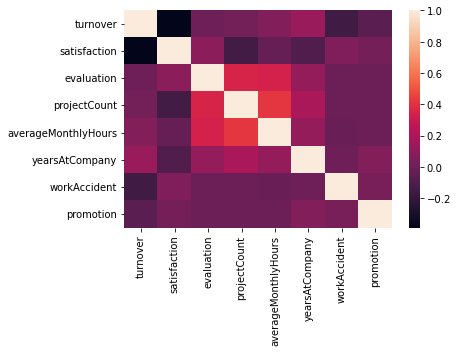

In [15]:
#heatmap
sns.heatmap(corr, yticklabels = corr.columns.values, xticklabels = corr.columns.values)

One-Sample T-Test (Measuring Satisfaction Level)

A one-sample t-test checks whether a sample mean differs from the population mean. Since satisfaction has the highest correlation with our dependent variable turnover, let's test to see whether the average satisfaction level of employees that had a turnover differs from the those that had no turnover.

Hypothesis Testing: Is there significant difference in the means of satisfaction level between employees who had a turnover and temployees who had no turnover?

Null Hypothesis: (H0: pTS = pES) The null hypothesis would be that there is no difference in satisfaction level between employees who did turnover and those who did not..

Alternate Hypothesis: (HA: pTS != pES) The alternative hypothesis would be that there is a difference in satisfaction level between employees who did turnover and those who did not..

In [16]:
#employee tunnover vs non-turnover satisfaction
emp_pop = df["satisfaction"][df["turnover"] == 0].mean()  #non-turnover
emp_turnover_satisfaction = df[df["turnover"]== 1]["satisfaction"].mean()  #turnover
print("non-turnover = " + str(emp_pop))
print("turnover = " + str(emp_turnover_satisfaction))

non-turnover = 0.666809590479524
turnover = 0.4400980117614114


In [17]:
#t-test at 95% confidence level
import scipy.stats as stats
stats.ttest_1samp(a = df[df["turnover"] == 1]["satisfaction"], popmean = emp_pop)

Ttest_1sampResult(statistic=-51.33034867547431, pvalue=0.0)

In [18]:
#t-test quantile - to verify and eliminate a hypothesis based on the test statistic, t = -51.33, in the above case
degree_freedom = len(df[df["turnover"] == 1])
lq = stats.t.ppf(0.025, degree_freedom) #left quartile
rq = stats.t.ppf(0.975, degree_freedom)
print(lq, rq)

-1.9606285215955626 1.9606285215955621


T-Test = -51.33 | P-Value = 0.000_ | Reject Null Hypothesis, -51 is not in the range of [lq,rq]

Distribution plots

C:\Users\Varsha\anaconda3\envs\btp\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Employee count')

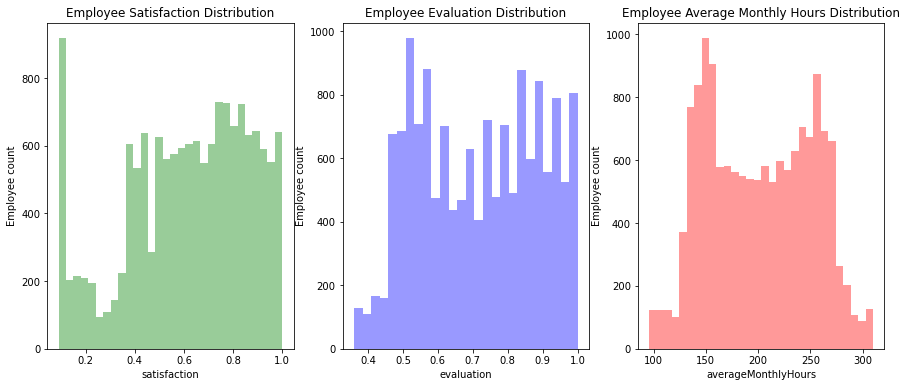

In [19]:
#setting up the matplotlib fig
f, axes = plt.subplots(ncols = 3, figsize = (15,6))

#graph employee satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel("Employee count")

#graph employee evaluation
sns.distplot(df.evaluation, kde=False, color="b", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel("Employee count")

#graph employee average monthly hours
sns.distplot(df.averageMonthlyHours, kde=False, color="r", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel("Employee count")

continue from line 22

# salary vs turnover

Text(0.5, 1.0, 'Employee Salary Turnover Distribution')

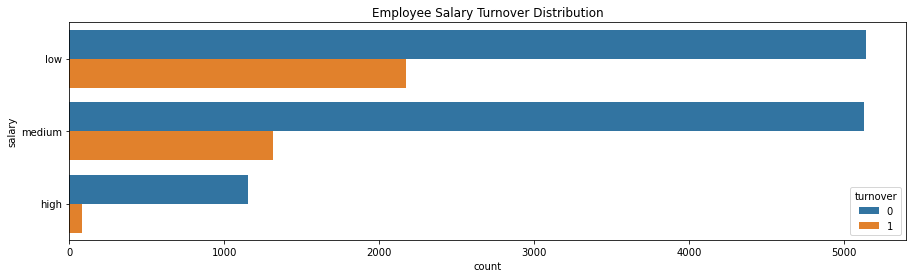

In [20]:
#employee salary turnover dist.
f, ax = plt.subplots(figsize=(15,4))
sns.countplot(y = "salary", hue = "turnover", data = df).set_title('Employee Salary Turnover Distribution')

# department vs turnover

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

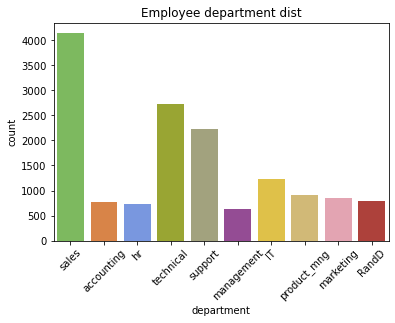

In [21]:
#employee dist
#types of colours

color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

sns.countplot(x = "department", data = df, palette = color_types).set_title("Employee department dist")

#reposition x-labels
plt.xticks(rotation = 45)

Text(0.5, 1.0, 'Employee Department Turnover Distribution')

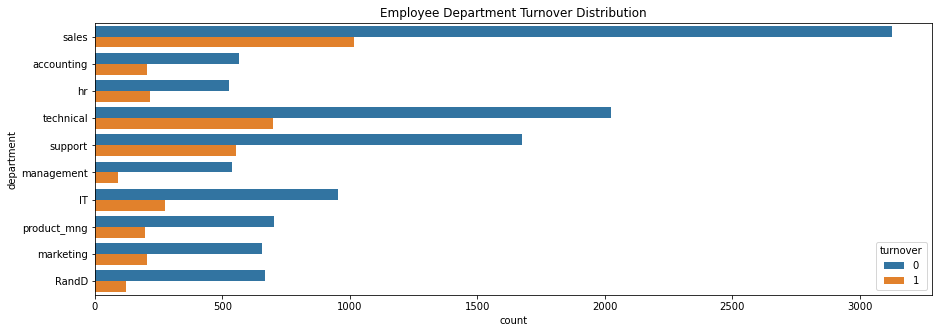

In [22]:
#employee department turnover dist - combining the above to bar graphs
f, ax = plt.subplots(figsize = (15,5))

sns.countplot(y = "department", hue = "turnover", data = df).set_title('Employee Department Turnover Distribution')

# turnover vs project count

[Text(0, 0.5, 'percent')]

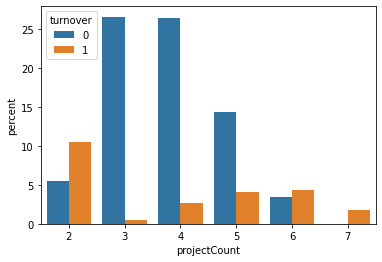

In [23]:
ax = sns.barplot(x = "projectCount", y = "projectCount", data = df, hue = "turnover", estimator = lambda x: len(x) / len(df) * 100)
ax.set(ylabel = "percent")

# turnover vs evaluation

C:\Users\Varsha\anaconda3\envs\btp\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Legend does not support 'n' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
C:\Users\Varsha\anaconda3\envs\btp\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
C:\Users\Varsha\anaconda3\envs\btp\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Legend does not support '-' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
C:\Users\Varsha\anaconda3\envs\btp\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Legend does not support 't'

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

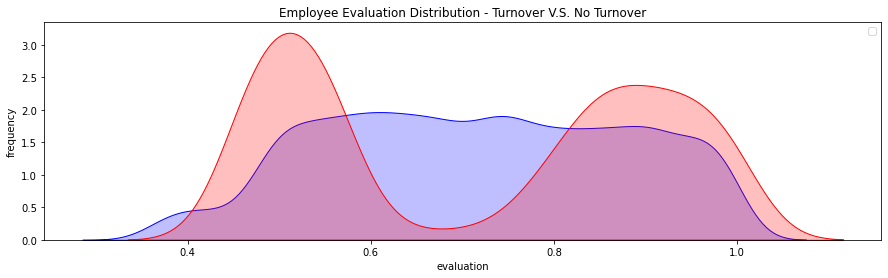

In [24]:
#kernel density plot
fig = plt.figure(figsize=(15,4))

ax = sns.kdeplot(df.loc[(df['turnover'] == 0), 'evaluation'], label = 'no turnover',color = "b", shade = True)
ax = sns.kdeplot(df.loc[(df['turnover'] == 1), 'evaluation'], label = 'turnover', color = "r", shade = True)
ax.set(xlabel = "evaluation", ylabel = "frequency")

plt.legend("non-turnover", "turnover")

plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

# Turnover V.S. AverageMonthlyHours

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

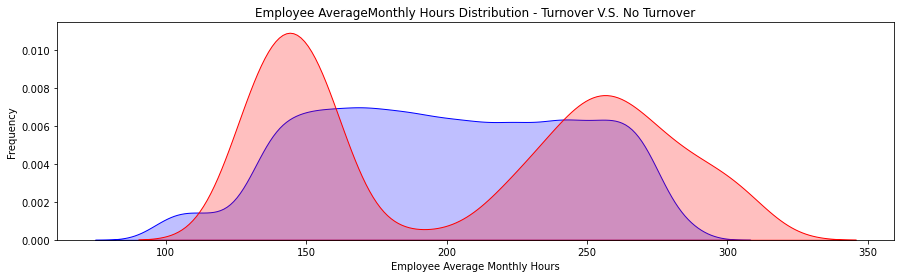

In [25]:
#another kde plot
fig = plt.figure(figsize=(15,4))
ax = sns.kdeplot(df.loc[(df["turnover"] == 0), "averageMonthlyHours"], color = "b", shade = True, label='no turnover')
ax = sns.kdeplot(df.loc[(df["turnover"] == 1), "averageMonthlyHours"], color = "r", shade = True, label = "turnover")
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

# Turnover V.S. Satisfaction

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

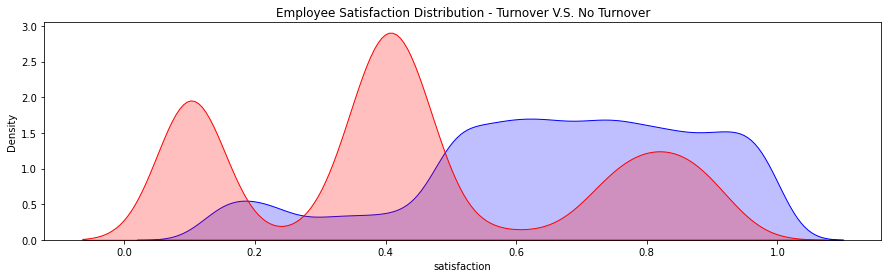

In [26]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

# ProjectCount VS AverageMonthlyHours

<AxesSubplot:xlabel='projectCount', ylabel='averageMonthlyHours'>

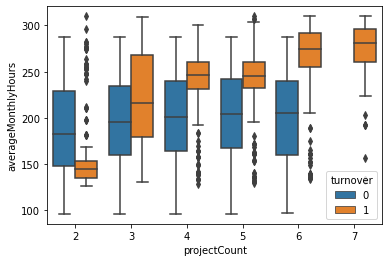

In [27]:
#boxplot
sns.boxplot(x = "projectCount", y = "averageMonthlyHours", hue = "turnover", data = df)

# ProjectCount VS Evaluation

<AxesSubplot:xlabel='projectCount', ylabel='evaluation'>

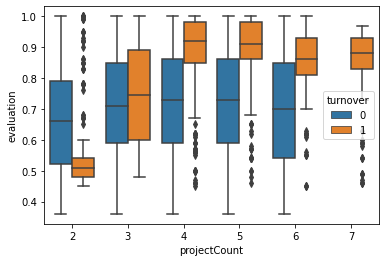

In [28]:
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)

# Satisfaction VS Evaluation

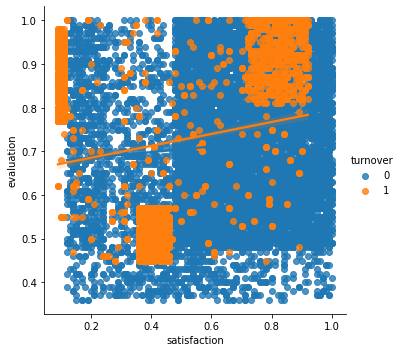

In [29]:
#lmplot
sns.lmplot(x='satisfaction', y='evaluation', data=df,
           fit_reg=True, # No regression line
           hue='turnover')   # Color by evolution stage

# Turnover V.S. YearsAtCompany

[Text(0, 0.5, 'Percent')]

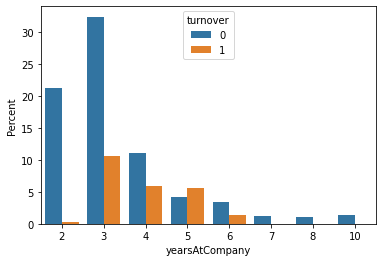

In [30]:
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

# K-Means Clustering of Employee Turnover

Cluster 1 (Blue): Hard-working and Sad Employees

Cluster 2 (Red): Bad and Sad Employee

Cluster 3 (Green): Hard-working and Happy Employee

In [31]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


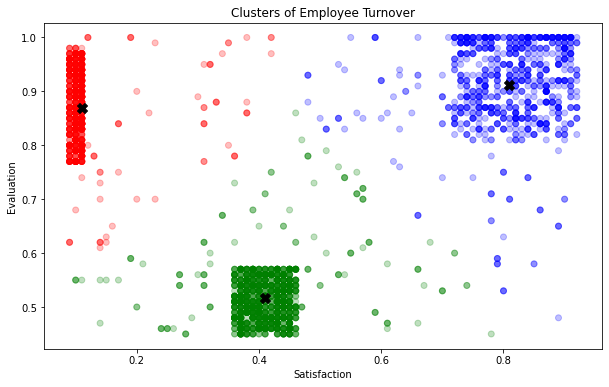

In [32]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

continue from line 33

# Feature Importance

Summary:

By using a decision tree classifier, it could rank the features used for the prediction. The top three features were employee satisfaction, yearsAtCompany, and evaluation. This is helpful in creating our model for logistic regression because it’ll be more interpretable to understand what goes into our model when we utilize less features.

Top 3 Features:

Satisfaction

YearsAtCompany

Evaluation

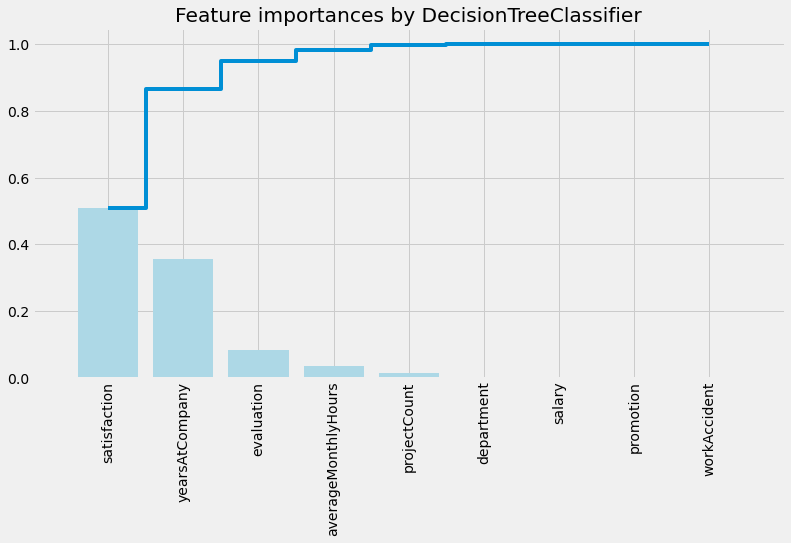

In [33]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)


y=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Part 4 - Modeling the Data: Logistic Regression Analysis

In [34]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
#Read the analytics csv file and store our dataset into a dataframe called "df"
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler
#df = pd.DataFrame.from_csv('turnover.csv', index_col=None)

# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes


# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)

# Create an intercept term for the logistic regression equation
df['int'] = 1
indep_var = ['satisfaction', 'evaluation', 'yearsAtCompany', 'int', 'turnover']
df = df[indep_var]

# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)

y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

X_train.head()
#

,satisfaction,evaluation,yearsAtCompany,int
9003,0.59,1.00,3,1
5697,0.81,0.98,2,1
10691,1.00,0.93,2,1
1884,0.87,0.91,5,1
13572,0.87,0.48,3,1


# Using Logistic Regression Coefficients

In [35]:
import statsmodels.api as sm
iv = ['satisfaction','evaluation','yearsAtCompany', 'int']
logReg = sm.Logit(y_train, X_train[iv])
answer = logReg.fit()

answer.summary
answer.params

Optimization terminated successfully.
         Current function value: 0.467233
         Iterations 6


satisfaction     -3.769022
evaluation        0.207596
yearsAtCompany    0.170145
int               0.181896
dtype: float64

In [36]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [37]:
# Create function to compute coefficients
coef = answer.params
def y (coef, Satisfaction, Evaluation, YearsAtCompany) : 
    return coef[3] + coef[0]*Satisfaction + coef[1]*Evaluation + coef[2]*YearsAtCompany

import numpy as np

# An Employee with 0.7 Satisfaction and 0.8 Evaluation and worked 3 years has a 14% chance of turnover
y1 = y(coef, 0.7, 0.8, 3)
p = np.exp(y1) / (1+np.exp(y1))
p

0.14431462559738242

In [38]:
answer.params

satisfaction     -3.769022
evaluation        0.207596
yearsAtCompany    0.170145
int               0.181896
dtype: float64

Intepretation of Score
If you were to use these employee values into the equation:

Satisfaction: 0.7
Evaluation: 0.8
YearsAtCompany: 3
You would get:

Employee Turnover Score = (0.7)(-3.769022) + (0.8)(0.207596) + (3)(0.170145) + 0.181896 = 0.14431 = 14%

Result: This employee would have a 14% chance of leaving the company. This information can then be used to form our retention plan.

# Retention Plan Using Logistic Regression

Reference: http://rupeshkhare.com/wp-content/uploads/2013/12/Employee-Attrition-Risk-Assessment-using-Logistic-Regression-Analysis.pdf

With the logistic regression model, we can now use our scores and evaluate the employees through different scoring metrics. Each zone is explain here:

Safe Zone (Green) – Employees within this zone are considered safe.

Low Risk Zone (Yellow) – Employees within this zone are too be taken into consideration of potential turnover. This is more of a long-term track.

Medium Risk Zone (Orange) – Employees within this zone are at risk of turnover. Action should be taken and monitored accordingly.

High Risk Zone (Red) – Employees within this zone are considered to have the highest chance of turnover. Action should be taken immediately.

So with our example above, the employee with a 14% turnover score will be in the safe zone.

# Using Other Models

NOTE: I'll be using four other models in this section to measure the accuracy of the different models

The best model performance out of the four (Decision Tree Model, AdaBoost Model, Logistic Regression Model, Random Forest Model) was Random Forest!

Remember: Machines can predict the future, as long as the future doesn't look too different from the past.

Note: Base Rate

A Base Rate Model is a simple model or heuristic used as reference point for comparing how well a model is performing. A baseline helps model developers quantify the minimal, expected performance on a particular problem. In this dataset, the majority class that will be predicted will be 0's, which are employees who did not leave the company.
If you recall back to Part 3: Exploring the Data, 24% of the dataset contained 1's (employee who left the company) and the remaining 76% contained 0's (employee who did not leave the company). The Base Rate Model would simply predict every 0's and ignore all the 1's.
Example: The base rate accuracy for this data set, when classifying everything as 0's, would be 76% because 76% of the dataset are labeled as 0's (employees not leaving the company).

CONTINUE FROM HERE

Note: Evaluating the Model

Precision and Recall / Class Imbalance

This dataset is an example of a class imbalance problem because of the skewed distribution of employees who did and did not leave. More skewed the class means that accuracy breaks down.

In this case, evaluating our model’s algorithm based on accuracy is the wrong thing to measure. We would have to know the different errors that we care about and correct decisions. Accuracy alone does not measure an important concept that needs to be taken into consideration in this type of evaluation: False Positive and False Negative errors.

False Positives (Type I Error): You predict that the employee will leave, but do not

False Negatives (Type II Error): You predict that the employee will not leave, but does leave

In this problem, what type of errors do we care about more? False Positives or False Negatives?

Note: Different Ways to Evaluate Classification Models

Predictive Accuracy: How many does it get right?
Speed: How fast does it take for the model to deploy?
Scalability: Can the model handle large datasets?
Robustness: How well does the model handle outliers/missing values?
Interpretability: Is the model easy to understand?

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [41]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [42]:
# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)
#robust_scaler = RobustScaler()
#X = robust_scaler.fit_transform(X)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [43]:
# Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.76


In [44]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.77


In [49]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle = True)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.793 (0.010)


# Logistic Regression V.S. Random Forest V.S. Decision Tree V.S. AdaBoost Model

In [50]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1714
           1       0.00      0.00      0.00       536

    accuracy                           0.76      2250
   macro avg       0.38      0.50      0.43      2250
weighted avg       0.58      0.76      0.66      2250



 ---Logistic Model---
Logistic AUC = 0.74
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1714
           1       0.48      0.73      0.58       536

    accuracy                           0.75      2250
   macro avg       0.69      0.74      0.70      2250
weighted avg       0.80      0.75      0.76      2250



 ---Decision Tree Model---
Decision Tree AUC = 0.94
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1714
           1       0.87      0.91      0.89       536

    accuracy                           0.95   

C:\Users\Varsha\anaconda3\envs\btp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Varsha\anaconda3\envs\btp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Varsha\anaconda3\envs\btp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




 ---Random Forest Model---
Random Forest AUC = 0.97
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1714
           1       0.94      0.96      0.95       536

    accuracy                           0.98      2250
   macro avg       0.97      0.97      0.97      2250
weighted avg       0.98      0.98      0.98      2250



 ---AdaBoost Model---
AdaBoost AUC = 0.90
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1714
           1       0.90      0.82      0.86       536

    accuracy                           0.94      2250
   macro avg       0.92      0.90      0.91      2250
weighted avg       0.93      0.94      0.93      2250



# ROC Graph

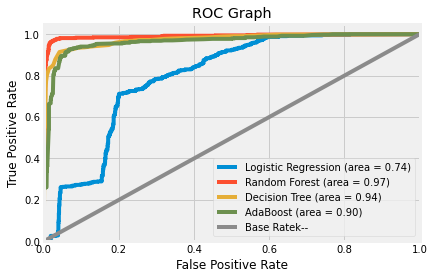

In [51]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1]) #(logistic regression)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# 5. Interpreting the Data

Summary: With all of this information, this is what Susan should know about her company and why her employees probably left:

Employees generally left when they are underworked (less than 150hr/month or 6hr/day)

Employees generally left when they are overworked (more than 250hr/month or 10hr/day)

Employees with either really high or low evaluations should be taken into consideration for high turnover rate

Employees with low to medium salaries are the bulk of employee turnover

Employees that had 2,6, or 7 project count was at risk of leaving the company

Employee satisfaction is the highest indicator for employee turnover.

Employee that had 4 and 5 yearsAtCompany should be taken into consideration for high turnover rate

Employee satisfaction, yearsAtCompany, and evaluation were the three biggest factors in determining turnover.